In [0]:
!pip install tensorflow==2.0.0

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
# load in the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [0]:
# Number of classes
"""
set() method is used to convert any of the iterable, 
to the distinct element and sorted sequence of iterable elements
- set is a data structure that contains unique elements
"""
print(set(y_train))
k = len(set(y_train))
print(f"Number of classes: {k}")

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
Number of classes: 10


(array([6000.,    0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,
           0., 6000.,    0., 6000.,    0., 6000.,    0., 6000.,    0.,
        6000.]),
 array([0.        , 0.47368421, 0.94736842, 1.42105263, 1.89473684,
        2.36842105, 2.84210526, 3.31578947, 3.78947368, 4.26315789,
        4.73684211, 5.21052632, 5.68421053, 6.15789474, 6.63157895,
        7.10526316, 7.57894737, 8.05263158, 8.52631579, 9.        ]),
 <a list of 19 Patch objects>)

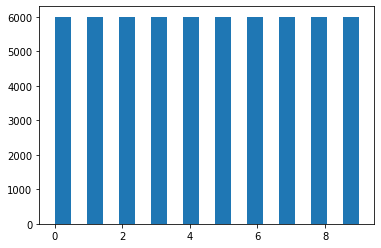

In [0]:
plt.hist(y_train, bins=19) # Same amount of training samples for each label

In [0]:
# Label Mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle Boot'''.split('\n')
labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle Boot']

In [0]:
# now split the x_train to train set and Validation set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [0]:
print(x_train.shape, y_train.shape)
print(x_val.shape, y_train.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (48000,)


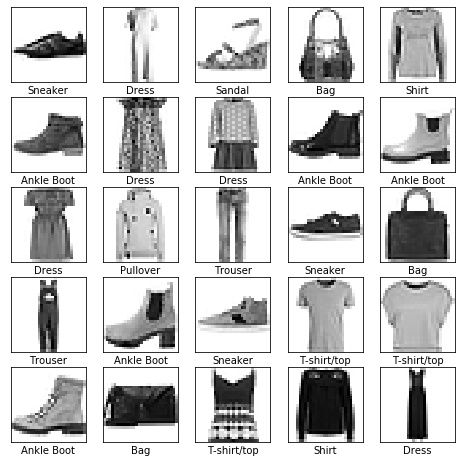

In [0]:
# plot first few images
plt.figure(figsize=(8,8))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(labels[y_train[i]])
plt.show() 

# Build the model

In [0]:
# lets initialize weights
input_shape = 28*28
output_shape = 10
hidden_1_shape = 128
hidden_2_shape = 64
hidden_3_shape = 32


# initialize variable for weights
weights = {
    'hidden_1': tf.Variable(tf.random.truncated_normal([input_shape, hidden_1_shape]),trainable=True),
    'hidden_2': tf.Variable(tf.random.truncated_normal([hidden_1_shape, hidden_2_shape]),trainable=True),
    'hidden_3': tf.Variable(tf.random.truncated_normal([hidden_2_shape, hidden_3_shape]),trainable=True,),
    'output': tf.Variable(tf.random.truncated_normal([hidden_3_shape, output_shape]),trainable=True),
    'hidden_1_bias': tf.Variable(tf.random.truncated_normal([hidden_1_shape]),trainable=True),
    'hidden_2_bias': tf.Variable(tf.random.truncated_normal([hidden_2_shape]),trainable=True),
    'hidden_3_bias': tf.Variable(tf.random.truncated_normal([hidden_3_shape]),trainable=True),
    'output_bias': tf.Variable(tf.random.truncated_normal([output_shape]),trainable=True)
}

In [0]:
# lets initialize weight matrix
input_shape = 28*28   # Width * Height of each image
output_shape = 10     # total number of labels
hidden_1_shape = 128
hidden_2_shape = 64
hidden_3_shape = 32

# initialize variable for weights
weights = {
    'hidden_1': tf.Variable(tf.random.truncated_normal([input_shape, hidden_1_shape]), trainable=True),
    'hidden_2': tf.Variable(tf.random.truncated_normal([hidden_1_shape, hidden_2_shape]), trainable=True),
    'hidden_3': tf.Variable(tf.random.truncated_normal([hidden_2_shape, hidden_3_shape]), trainable=True),
    'output': tf.Variable(tf.random.truncated_normal([hidden_3_shape, output_shape]), trainable=True),
    'hidden_1_bias': tf.Variable(tf.random.truncated_normal([hidden_1_shape]), trainable=True),
    'hidden_2_bias': tf.Variable(tf.random.truncated_normal([hidden_2_shape]), trainable=True),
    'hidden_3_bias': tf.Variable(tf.random.truncated_normal([hidden_3_shape]), trainable=True),
    'output_bias': tf.Variable(tf.random.truncated_normal([output_shape]), trainable=True)
}

In [0]:
x_train.shape

(48000, 28, 28)

In [0]:
# Combine features (height and width) into single column vector
x_train = tf.reshape(x_train, (-1, input_shape))
x_val = tf.reshape(x_val, (-1, input_shape))
x_test = tf.reshape(x_test, (-1, input_shape))

In [0]:
print(x_train.shape)

(48000, 784)


In [0]:
# Split data into Batch
def create_batch(x, y, batch_size):
    x = tf.cast(x, tf.float32) # cast the datatype to float32
    data = tf.data.Dataset.from_tensor_slices((x, y)).batch(batch_size)
    return data

In [0]:
def train_epoch_by_epoch(data):
    """
    Here forward propagation and backward propagation occurs.
    tf.GradientTape record the trainable parameter during forward propagation and adjust
    gradient during backward propagation.
    Here we use, categorical loss which needs two parameter: actual label(one-hot encoded)
    and prediction(which is output of softmax).
    Instead of using softmax activation we use (from_login=True) argument ** Refer Docs
    """
    for i in data:
        with tf.GradientTape() as tape:
            fc_1 = tf.sigmoid(tf.add(tf.matmul(i[0], weights['hidden_1']), weights['hidden_1_bias']))
            fc_2 = tf.sigmoid(tf.add(tf.matmul(fc_1, weights['hidden_2']), weights['hidden_2_bias']))
            fc_3 = tf.sigmoid(tf.add(tf.matmul(fc_2, weights['hidden_3']), weights['hidden_3_bias']))
            output_layer = tf.add(tf.matmul(fc_3, weights['output']), weights['output_bias'])
            label = tf.one_hot(i[1], 10)
            cost = loss(label, output_layer)
        grads = tape.gradient(cost, trainable_weights)
        optimizer.apply_gradients(zip(grads, trainable_weights))
    return True

In [0]:
def eval_epoch_by_epoch(data):
    """
    This function is used to evaluate the model.
    Here in this mode, only the forward propagation is done.
    """
    total_cost = 0
    accuracy = 0
    total_iter = 0
    for i in data:
        size = (i[0].shape)[0]
        fc_1 = tf.sigmoid(tf.add(tf.matmul(i[0], weights['hidden_1']), weights['hidden_1_bias']))
        fc_2 = tf.sigmoid(tf.add(tf.matmul(fc_1, weights['hidden_2']), weights['hidden_2_bias']))
        fc_3 = tf.sigmoid(tf.add(tf.matmul(fc_2, weights['hidden_3']), weights['hidden_3_bias']))
        output_layer = tf.add(tf.matmul(fc_3, weights['output']), weights['output_bias'])
        label = tf.one_hot(i[1], 10)
        cost = loss(label, output_layer)
        total_cost += cost
        predicted = tf.argmax(output_layer, axis=1)
        label = tf.cast(i[1], tf.int64)
        res = tf.equal(predicted, label)
        mean_correct = tf.reduce_sum(tf.cast(res, tf.float32)) / size
        accuracy += mean_correct
        total_iter += 1
    return (total_cost/total_iter, accuracy/total_iter)

In [0]:
# Sanity Check
# Here we take on batch of size 128 and train the model over and over again
# to check whether it overfits the data or not. Here accuracy must gradually
# increase and if further trained then, it would eventually be 100% accurate.

learning_rate = 0.01
epoch = 200
batch_size = 128
loss = tf.losses.CategoricalCrossentropy(from_logits=True)  # Check what if we donot pass 'from_logits' arg
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

trainable_weights = []   # Our previous weight was in dictionary. Now we convert it into list
for i in weights:
    trainable_weights.append(weights[i])
# print(trainable_weights)
# Initialize the train cost and accuracy
train_cost_list = []
train_accuracy_list = []

for i in range(epoch):
    train_data = create_batch(x_train, y_train, batch_size)
    train_data = iter(train_data)
    train_data = [next(train_data)]
    train_epoch_by_epoch(train_data)
    
    train_cost, train_acc = eval_epoch_by_epoch(train_data)
    
    train_cost_list.append(train_cost)
    train_accuracy_list.append(train_acc)
    
    if (i % 10 == 0):
        print(f"Epoch:({i}/{epoch})  loss: {train_cost:.4f}  accuracy: {train_acc:.2f}")

Epoch:(0/200)  loss: 4.2341  accuracy: 0.05
Epoch:(10/200)  loss: 2.0132  accuracy: 0.23
Epoch:(20/200)  loss: 1.5904  accuracy: 0.47
Epoch:(30/200)  loss: 1.2429  accuracy: 0.61
Epoch:(40/200)  loss: 0.9992  accuracy: 0.72
Epoch:(50/200)  loss: 0.7858  accuracy: 0.80
Epoch:(60/200)  loss: 0.5939  accuracy: 0.85
Epoch:(70/200)  loss: 0.4367  accuracy: 0.92
Epoch:(80/200)  loss: 0.3213  accuracy: 0.96
Epoch:(90/200)  loss: 0.2254  accuracy: 0.98
Epoch:(100/200)  loss: 0.1970  accuracy: 0.98
Epoch:(110/200)  loss: 0.1410  accuracy: 0.99
Epoch:(120/200)  loss: 0.1009  accuracy: 1.00
Epoch:(130/200)  loss: 0.0718  accuracy: 1.00
Epoch:(140/200)  loss: 0.0572  accuracy: 1.00
Epoch:(150/200)  loss: 0.0423  accuracy: 1.00
Epoch:(160/200)  loss: 0.0322  accuracy: 1.00
Epoch:(170/200)  loss: 0.0254  accuracy: 1.00
Epoch:(180/200)  loss: 0.0210  accuracy: 1.00
Epoch:(190/200)  loss: 0.0177  accuracy: 1.00


In [0]:
import numpy as np
total_cost_array = np.array(train_cost_list)
total_accuracy_array = np.array(train_accuracy_list)
epoch_list = []
for i in range(epoch):
    epoch_list.append(i)

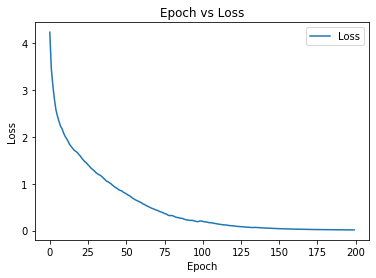

In [0]:
# Plot Epoch vs Loss Graph
plt.plot(epoch_list, total_cost_array.tolist(), label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

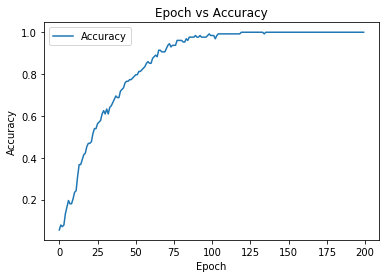

In [0]:
# Plot Epoch vs Accuracy Graph
plt.plot(epoch_list, total_accuracy_array.tolist(), label="Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Accuracy")
plt.legend()
plt.show()

In [0]:
# Train the Model 
learning_rate = 0.001
epoch = 300
batch_size = 64

loss = tf.losses.CategoricalCrossentropy(from_logits=True)
optimizer = tf.optimizers.Adam(learning_rate=learning_rate)

trainable_weights = []
for i in weights:
    trainable_weights.append(weights[i])

train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []
epoch_list = []
for i in range(epoch):
    train_data = create_batch(x_train, y_train, batch_size)
    train_epoch_by_epoch(train_data)
    
    val_data = create_batch(x_val, y_val, batch_size)
        
    train_cost, train_acc = eval_epoch_by_epoch(train_data)
    val_cost, val_acc = eval_epoch_by_epoch(val_data)
        
    train_loss_list.append(train_cost)
    train_acc_list.append(train_acc)
    val_loss_list.append(val_cost)
    val_acc_list.append(val_acc)
    epoch_list.append(i)
    if (i % 10 == 0):    
        print(f"Epoch:({i}/{epoch}) loss: {train_cost:.5f} accuracy: {train_acc:.3f} val_loss: {val_cost:.5f} val_accuracy: {val_acc:.3f}")

Epoch:(0/300) loss: 0.85487 accuracy: 0.686 val_loss: 0.87094 val_accuracy: 0.684
Epoch:(10/300) loss: 0.63159 accuracy: 0.765 val_loss: 0.65107 val_accuracy: 0.758
Epoch:(20/300) loss: 0.56128 accuracy: 0.790 val_loss: 0.58404 val_accuracy: 0.780
Epoch:(30/300) loss: 0.53571 accuracy: 0.798 val_loss: 0.56946 val_accuracy: 0.782
Epoch:(40/300) loss: 0.51819 accuracy: 0.804 val_loss: 0.54675 val_accuracy: 0.793
Epoch:(50/300) loss: 0.51187 accuracy: 0.809 val_loss: 0.53112 val_accuracy: 0.802
Epoch:(60/300) loss: 0.49628 accuracy: 0.812 val_loss: 0.52208 val_accuracy: 0.804
Epoch:(70/300) loss: 0.49214 accuracy: 0.814 val_loss: 0.51525 val_accuracy: 0.807
Epoch:(80/300) loss: 0.47995 accuracy: 0.816 val_loss: 0.49758 val_accuracy: 0.812
Epoch:(90/300) loss: 0.46687 accuracy: 0.825 val_loss: 0.49160 val_accuracy: 0.815
Epoch:(100/300) loss: 0.45426 accuracy: 0.829 val_loss: 0.48033 val_accuracy: 0.818
Epoch:(110/300) loss: 0.44587 accuracy: 0.835 val_loss: 0.47586 val_accuracy: 0.824
Epo

In [0]:
predicted_list = []
def model_predict(data):
    """
    Returns Predicted Data
    """
    
    for i in data:
        size = (i[0].shape)[0]
        fc_1 = tf.sigmoid(tf.add(tf.matmul(i[0], weights['hidden_1']), weights['hidden_1_bias']))
        fc_2 = tf.sigmoid(tf.add(tf.matmul(fc_1, weights['hidden_2']), weights['hidden_2_bias']))
        fc_3 = tf.sigmoid(tf.add(tf.matmul(fc_2, weights['hidden_3']), weights['hidden_3_bias']))
        output_layer = tf.add(tf.matmul(fc_3, weights['output']), weights['output_bias'])
        predicted = tf.argmax(output_layer, axis=1)
        predicted_list.append(predicted)
    return predicted

In [0]:
#testing
#here we create batch of test data and forward it to model to get test accurcy
test_data = create_batch(x_test, y_test, 64)
test_cost, test_acc = eval_epoch_by_epoch(test_data)
predicted = model_predict(test_data)
print("Test Accuracy :",test_acc.numpy()*100)

Test Accuracy : 82.4840784072876


In [80]:
prediction_list = []
for batch_predicted in predicted_list:
    batch_predicted_array = np.array(batch_predicted)
    batch_predicted_list = batch_predicted_array.tolist()
    prediction_list.append(batch_predicted_list)

157

In [0]:
total_prediction_list = []
for i in range(len(prediction_list)):
    for j in range(len(prediction_list[i])):
        total_prediction_list.append(prediction_list[i][j])

In [0]:
total_loss_array = np.array(train_loss_list)
total_accuracy_array = np.array(train_acc_list)
val_loss_array = np.array(val_loss_list)
val_acc_array = np.array(val_acc_list)
epoch_list_array = np.array(epoch_list)

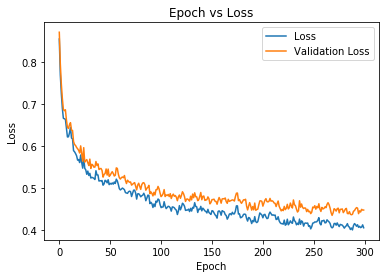

In [0]:
# Plot Epoch vs Loss Graph
plt.plot(epoch_list_array.tolist(), total_loss_array.tolist(), label="Loss")
plt.plot(epoch_list_array.tolist(), val_loss_array.tolist(), label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Epoch vs Loss")
plt.legend()
plt.show()

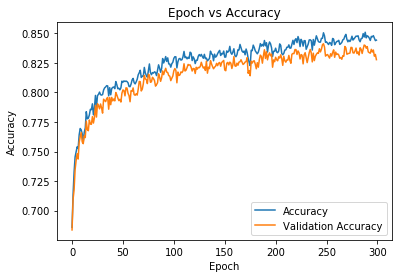

In [0]:
# Plot Epoch vs Accuracy Graph
plt.plot(epoch_list_array.tolist(), total_accuracy_array.tolist(), label="Accuracy")
plt.plot(epoch_list_array.tolist(), val_acc_array.tolist(), label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Accuracy")
plt.legend()
plt.show()

Confusion matrix without Normalization
[[746   6  11  71   5   1 143   0  17   0]
 [  3 950   7  29   6   0   3   0   2   0]
 [ 16   2 729  18 133   0  92   0  10   0]
 [ 35   9   9 877  32   0  35   0   2   1]
 [  2   0 145  56 684   1 107   0   5   0]
 [  0   0   0   0   0 930   0  41   2  27]
 [164   4 114  50  93   0 549   0  26   0]
 [  0   0   0   0   0  42   0 909   1  48]
 [  3   0  17   7   3   5  18   5 942   0]
 [  0   0   0   0   0  21   0  47   2 930]]


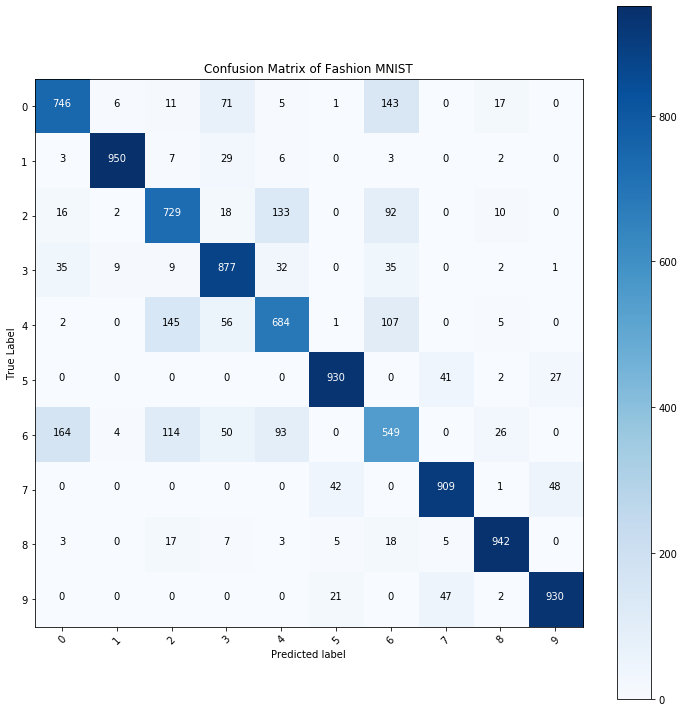

In [99]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title="Confusion Matrix of Fashion MNIST",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix without Normalization")
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    plt.rcParams['figure.figsize'] = [12,12]
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted label")
    plt.show()

p_test = total_prediction_list
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

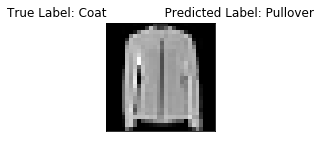

In [100]:
# Show some misclassified examples
plt.rcParams['figure.figsize'] = [2,2]
misclassified = np.where(p_test != y_test )[0]
i =  np.random.choice(misclassified)
plt.imshow(tf.reshape(x_test[i], (28,28)), cmap="gray")
plt.title(f"True Label: {labels[int(y_test[i])]} \
              Predicted Label: {labels[int(p_test[i])]}")
plt.xticks([])
plt.yticks([])
plt.show()

In [0]:
## For further advancement we could use Data Augmentation to the dataset and retrain the model